<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/calories_burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df_1=pd.read_csv("/content/calories.csv")

In [52]:
df_2=pd.read_csv("/content/exercise.csv")

In [53]:
df= pd.concat([df_1, df_2], axis=1)

In [54]:
df.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [55]:
df.isnull().sum()

,0
User_ID,0
Calories,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [56]:
sns.set_style("whitegrid")

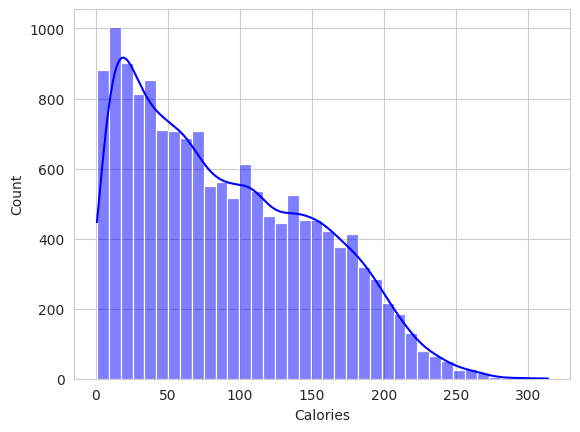

In [57]:
sns.histplot(data=df, x="Calories", kde=True, color="blue")
plt.show()

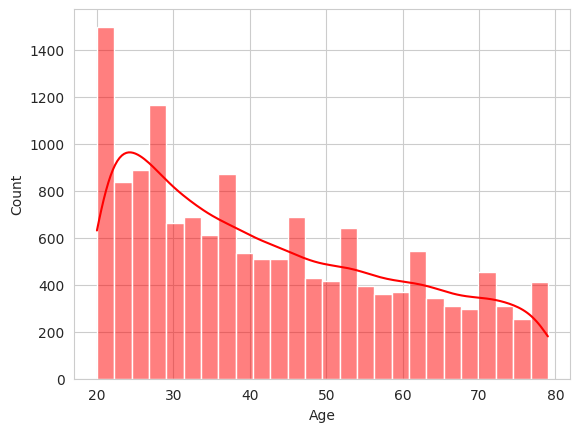

In [58]:
sns.histplot(data=df, x="Age", color="red", kde=True)
plt.show()

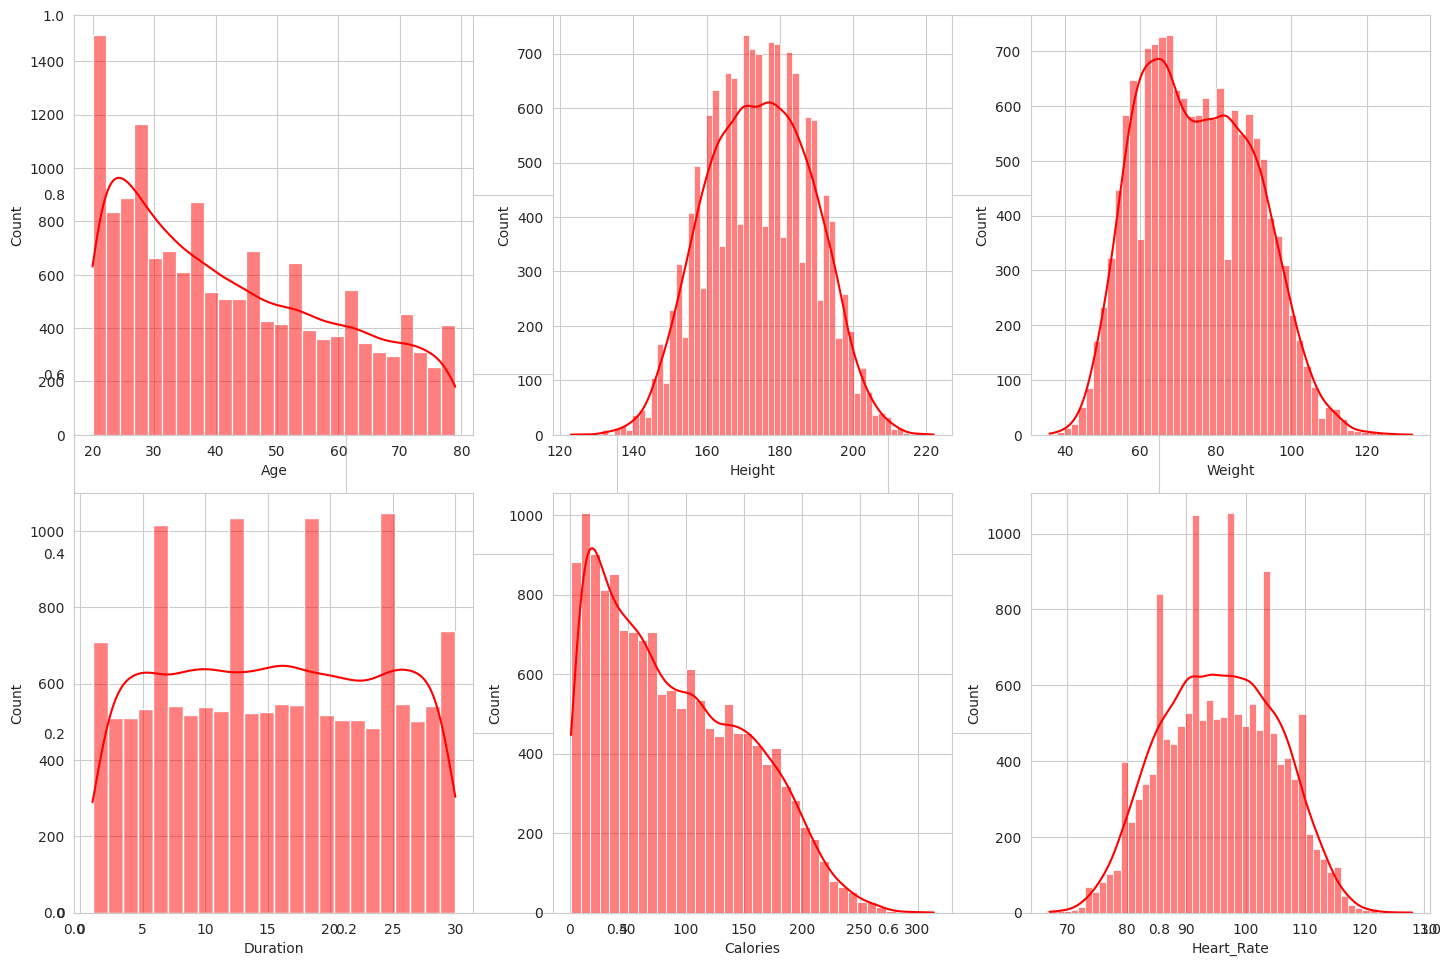

In [59]:
cols=["Age", "Height", "Weight", "Duration", "Calories", "Heart_Rate"]
plt.subplots(figsize=(15,10))
for i,col in enumerate(cols):
  plt.subplot(2,3,i+1)
  sns.histplot(data=df, x=col, kde=True, color="red")
  plt.tight_layout()
plt.show()

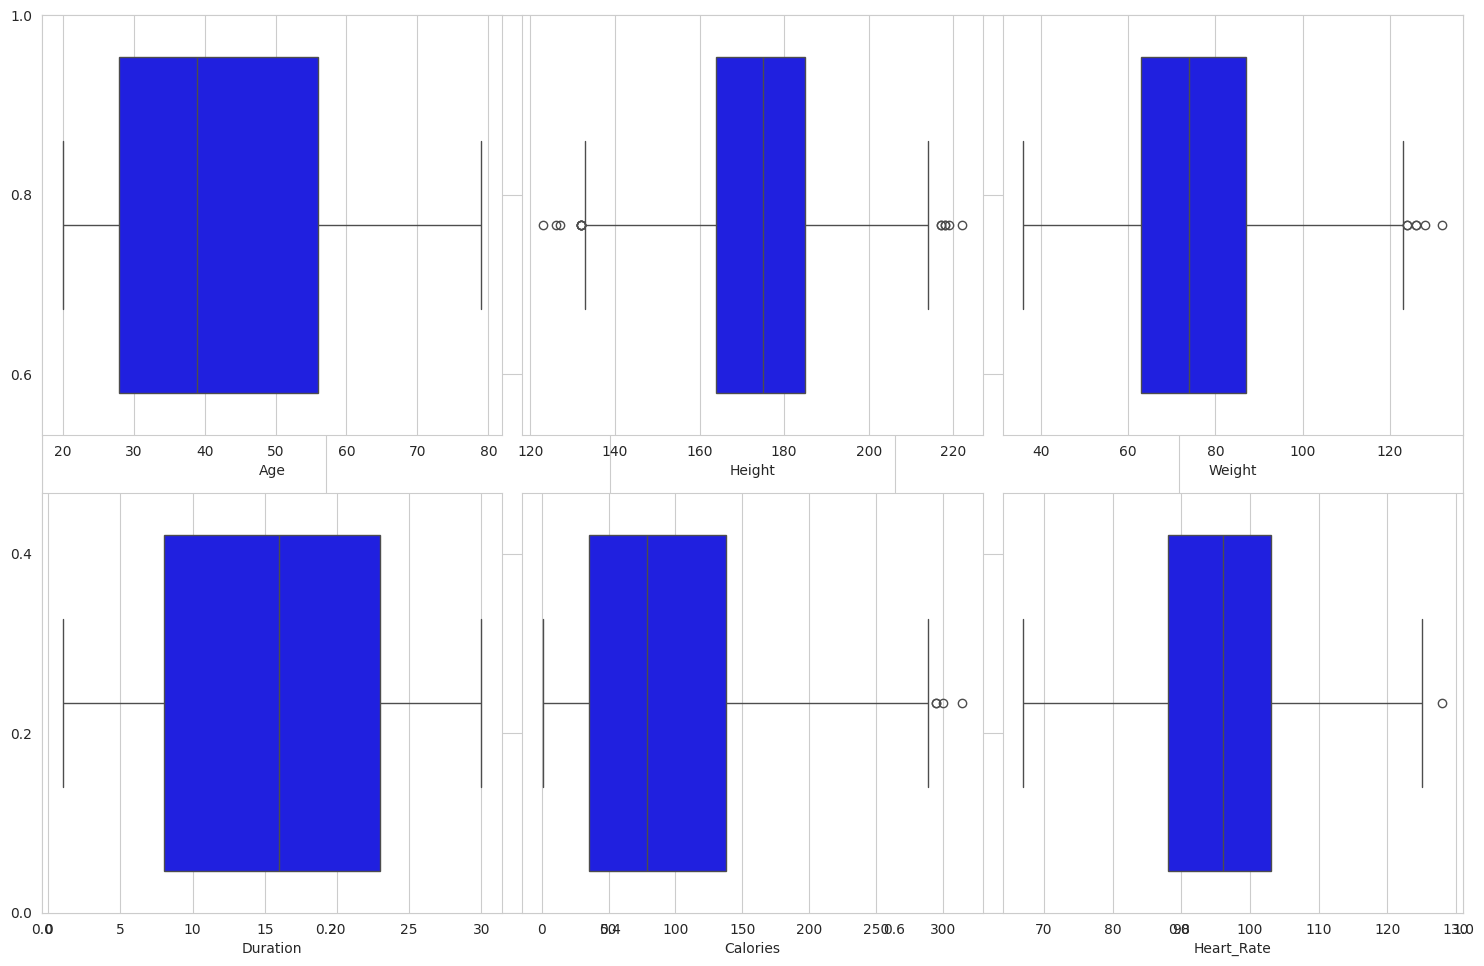

In [60]:
cols=["Age", "Height", "Weight", "Duration", "Calories", "Heart_Rate"]
plt.subplots(figsize=(15,10))
for i,col in enumerate(cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(data=df, x=col, color="blue")
  plt.tight_layout()
plt.show()

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

/tmp/ipython-input-62-2131168310.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male': 0, 'female': 1},


,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


In [63]:
df.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


In [64]:
df.drop(["User_ID"], axis=1, inplace=True)

In [65]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,35.0,1,27,154.0,58.0,10.0,81.0,39.8


In [66]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

In [67]:
X=df.drop(["Calories"],axis=1)
y=df["Calories"]

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X, y ,test_size=0.2, random_state=42)

In [73]:
models= [LinearRegression(), Lasso(), Ridge()]
for model in models:
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  print(f"{model.__class__.__name__}")
  print(f"MSE: {mean_squared_error(y_test, y_pred)}")
  print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

LinearRegression
MSE: 515.5729963607555
MAE: 18.022213923487943
Lasso
MSE: 518.1008766104983
MAE: 18.080439289675386
Ridge
MSE: 515.5699695611305
MAE: 18.022210647986057


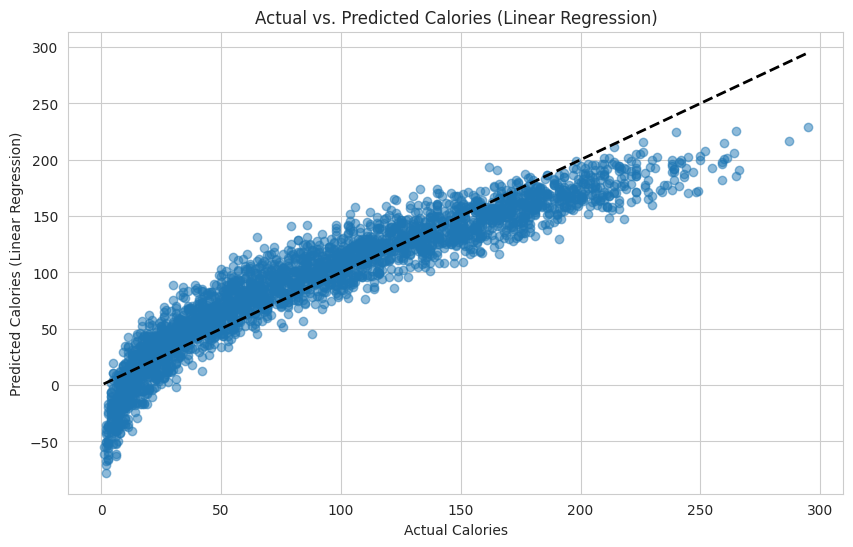

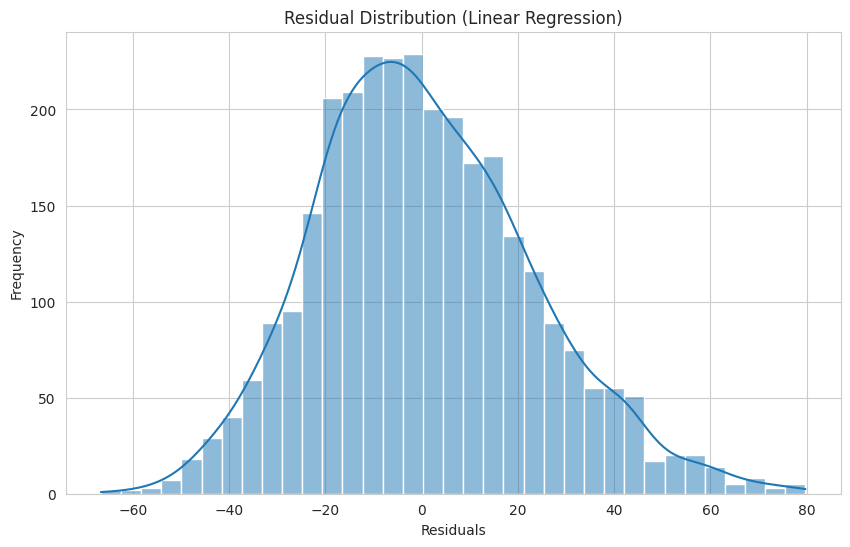

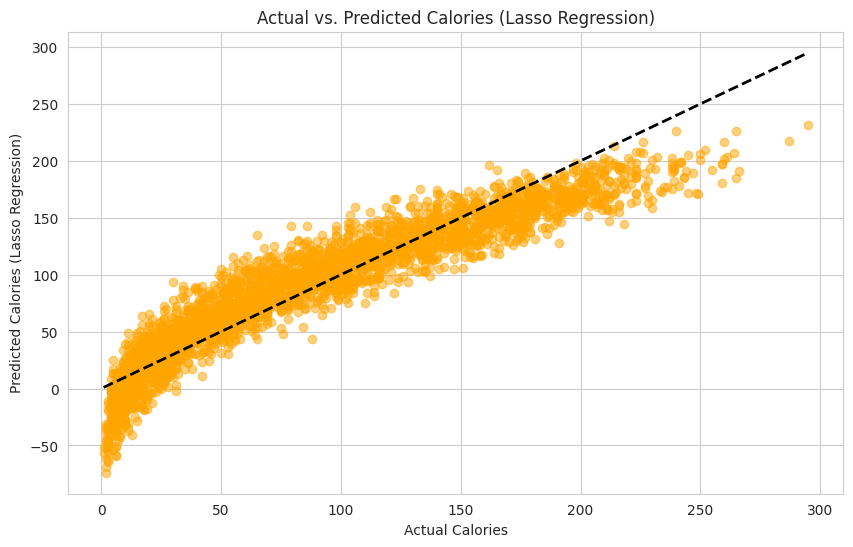

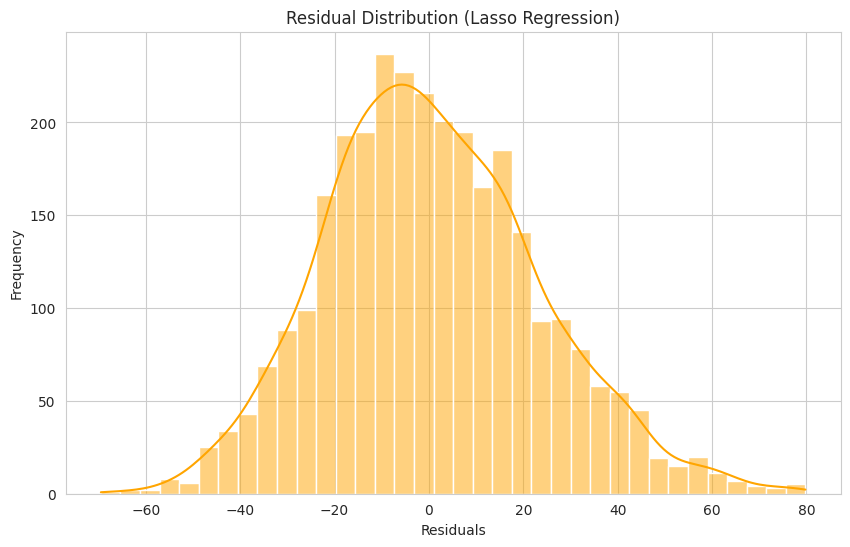

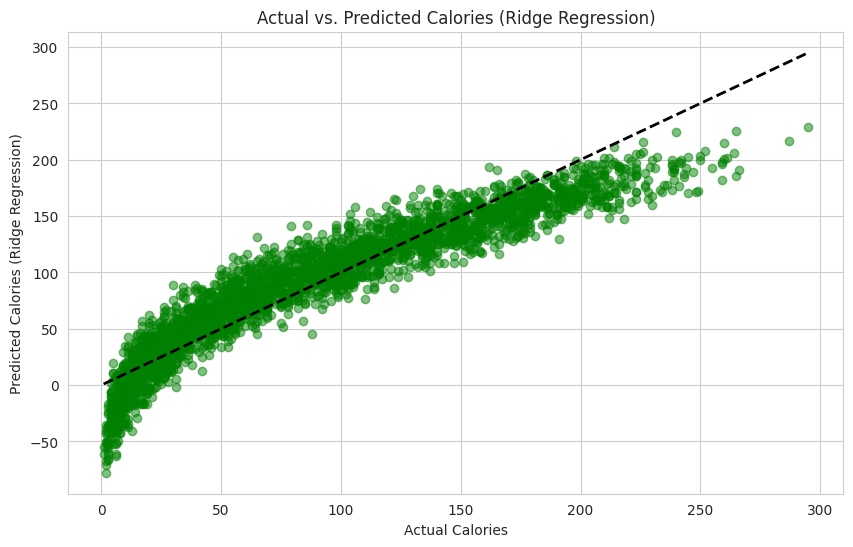

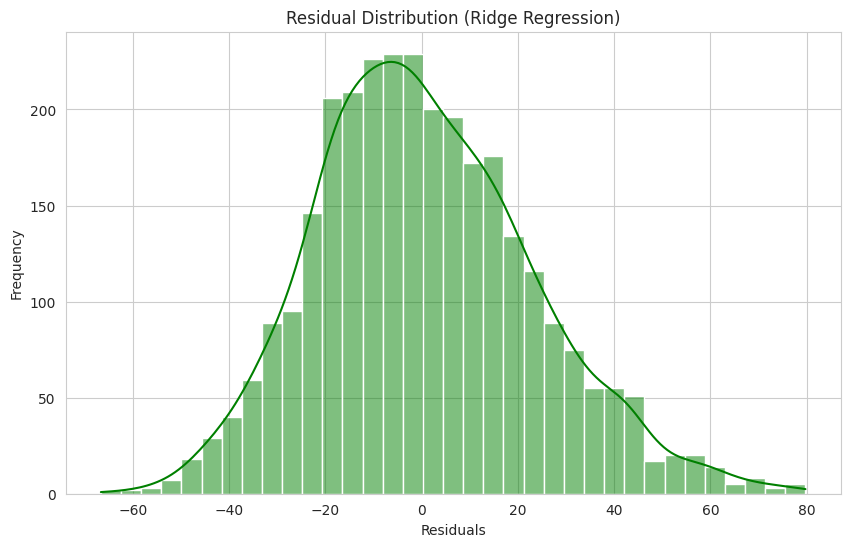

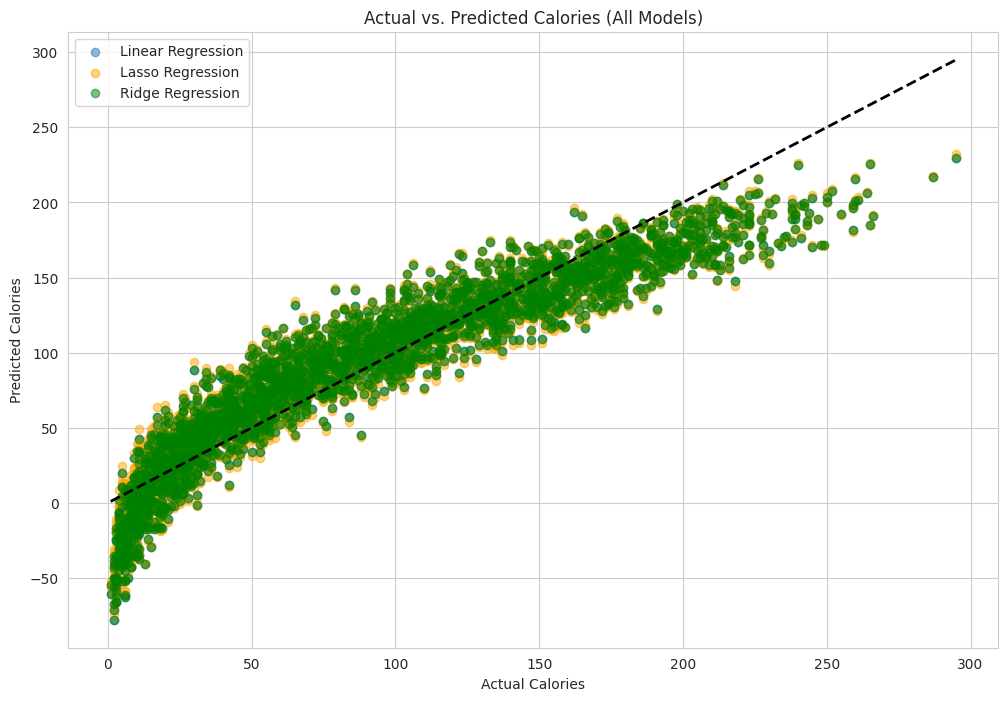

In [74]:
import matplotlib.pyplot as plt


lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_lr = lin_reg_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories (Linear Regression)")
plt.title("Actual vs. Predicted Calories (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Linear Regression)")
plt.show()


lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories (Lasso Regression)")
plt.title("Actual vs. Predicted Calories (Lasso Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lasso, kde=True, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Lasso Regression)")
plt.show()



ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories (Ridge Regression)")
plt.title("Actual vs. Predicted Calories (Ridge Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, kde=True, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Ridge Regression)")
plt.show()


plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange', label='Lasso Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green', label='Ridge Regression')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (All Models)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.legend()
plt.show()